In [ ]:
pip install matplotlib yfinance

In [24]:
# Pegando nosso database através do yfinance

import yfinance as yf
import pandas as pd

# Download historical stock data for Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2025-01-01')

# Save data to CSV
csv_filename = 'apple_stock_data_combined_years.csv'
data.to_csv(csv_filename)

[*********************100%***********************]  1 of 1 completed


# Primeira parte limpeza de dados - Remover linha
sed -i '1d' apple_stock_data_combined_years.csv

# Segundo passo - ChatGPT ajudou - arredondar casas decimais
awk 'BEGIN{FS=OFS=","} {for(i=1;i<=NF;i++) if($i ~ /^[0-9.]+$/) $i=sprintf("%.2f", $i)} 1' apple_stock_data_combined_years.csv > database.csv

In [25]:
import pandas as pd

# Caminho para o arquivo CSV
file_path = 'database.csv'

# Ler o arquivo CSV, pulando a linha intermediária ("Date,,,,,")
data = pd.read_csv(file_path, skiprows=1)

# Renomear a coluna 'Price' para 'Date'
data.rename(columns={'Price': 'Date'}, inplace=True)

# Converter a coluna 'Date' para o tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Definir a coluna 'Date' como índice
data.set_index('Date', inplace=True)

# Atribuir nomes claros às colunas
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Mostrar o DataFrame para verificar se os nomes foram definidos corretamente
print(data.head())

# Aqui você pode prosseguir com a visualização usando matplotlib ou outras etapas de análise

# Salvar o DataFrame limpo em um novo arquivo CSV
cleaned_file_path = 'cleaned_database.csv'
data.to_csv(cleaned_file_path)

# Mensagem de confirmação (opcional)
print(f'Dados limpos salvos em: {cleaned_file_path}')

             Close    High     Low    Open       Volume
Date                                                   
2023-01-03  123.77  129.54  122.88  128.92  112117500.0
2023-01-04  125.05  127.32  123.78  125.57   89113600.0
2023-01-05  123.72  126.44  123.46  125.81   80962700.0
2023-01-06  128.27  128.93  123.59  124.70   87754700.0
2023-01-09  128.80  132.02  128.54  129.11   70790800.0
Dados limpos salvos em: cleaned_database.csv


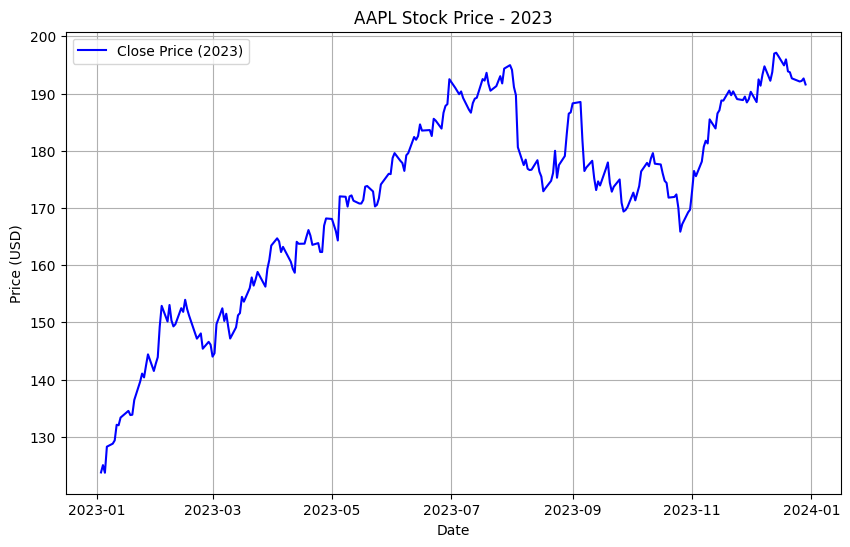

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

#TESTE GRÁFICO 2023
# Caminho para o arquivo CSV limpo
cleaned_file_path = 'cleaned_database.csv'

# Ler o arquivo CSV limpo
data = pd.read_csv(cleaned_file_path, index_col='Date', parse_dates=True)

# Filtrar dados para 2023
data_2023 = data.loc['2023-01-01':'2023-12-31']

# Plotar preços de fechamento para 2023
plt.figure(figsize=(10, 6))
plt.plot(data_2023.index, data_2023['Close'], label='Close Price (2023)', color='blue')

# Formatação
plt.title('AAPL Stock Price - 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

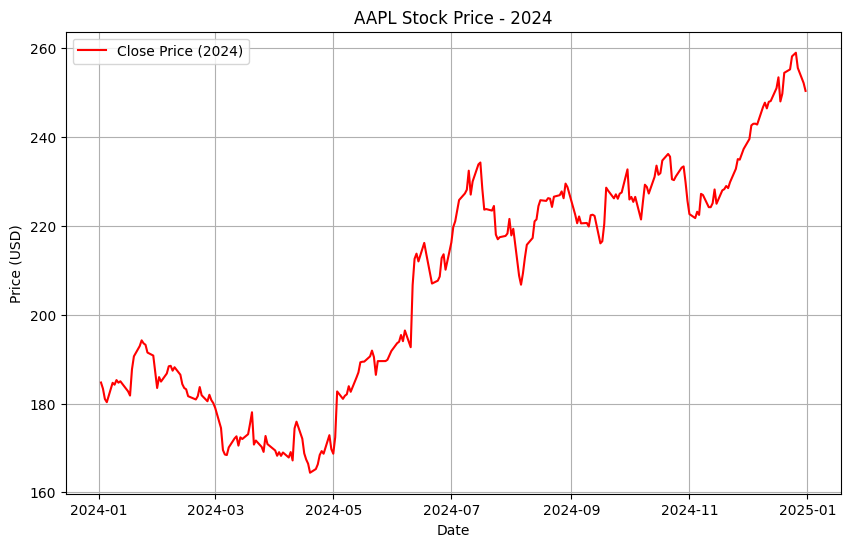

In [27]:
#TESTE GRÁFICO 2024

import pandas as pd
import matplotlib.pyplot as plt

# Filtrar dados para 2024
data_2024 = data.loc['2024-01-01':'2024-12-31']

# Plotar preços de fechamento para 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['Close'], label='Close Price (2024)', color='red')

# Formatação
plt.title('AAPL Stock Price - 2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

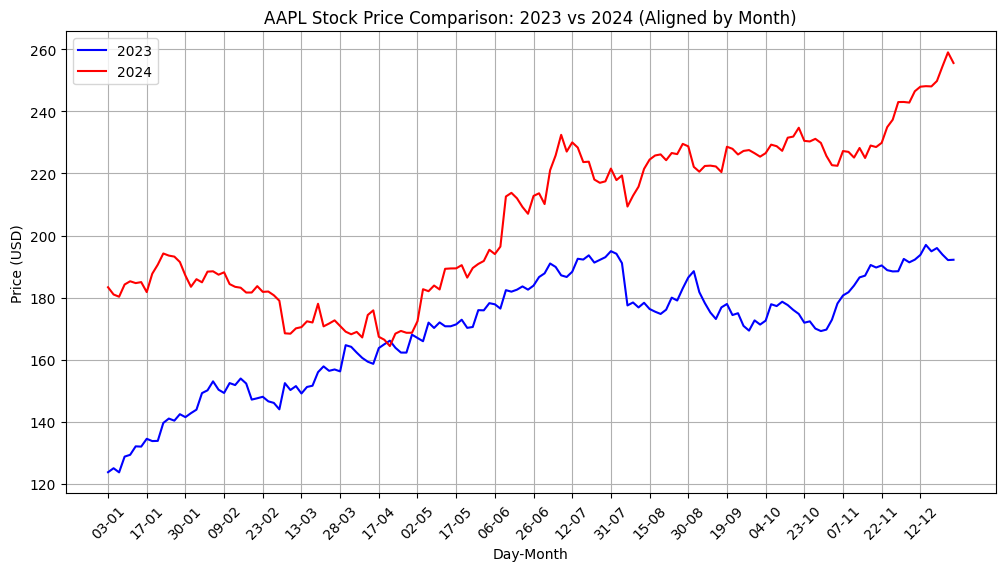

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Processar dados para 2023 e 2024
data_2023 = data.loc['2023-01-01':'2023-12-31'].copy()
data_2024 = data.loc['2024-01-01':'2024-12-31'].copy()

# Criar colunas para "Mês-Dia" (ignorando o ano) para alinhamento
data_2023['Day-Month'] = data_2023.index.strftime('%d-%m')
data_2024['Day-Month'] = data_2024.index.strftime('%d-%m')

# Mesclar ambos os conjuntos de dados com base em "Mês-Dia"
comparison_df = pd.merge(data_2023[['Close', 'Day-Month']], 
                         data_2024[['Close', 'Day-Month']], 
                         on='Day-Month', 
                         suffixes=('_2023', '_2024'))

# Plotar a comparação de 2023 e 2024 com meses devidamente alinhados
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Day-Month'], comparison_df['Close_2023'], label='2023', color='blue')
plt.plot(comparison_df['Day-Month'], comparison_df['Close_2024'], label='2024', color='red')

# Formatação
plt.title('AAPL Stock Price Comparison: 2023 vs 2024 (Aligned by Month)')
plt.xlabel('Day-Month')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Ajustar eixo x: Mostrar apenas o primeiro dia de cada mês
month_ticks = [comparison_df['Day-Month'][i] for i in range(0, len(comparison_df), 7)]
plt.xticks(month_ticks, rotation=45)  # Rotacionar labels para melhor legibilidade

# Exibir gráfico
plt.show()

In [36]:
# WEB SCRAPING - ORGANIZAR DEPOIS
# WEB SCRAPING PARA OBTER DATAS DE LANÇAMENTO DOS IPHONES
# TRADUZIR PARA INGLES DEPOIS DE REVISAR

import requests
from bs4 import BeautifulSoup
import csv

# URL da página Wikipedia com informações sobre iPhones
url = 'https://en.wikipedia.org/wiki/IPhone'

# Faz uma requisição GET para a página
response = requests.get(url)

# Analisa o conteúdo da página com BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontre a seção correta. Suponha que estamos buscando uma tabela específica pela classe ou outro identificador
table = soup.find('table', {'class': 'wikitable'})

# Lista para armazenar dados
iphone_data = []

# Iterar sobre as linhas da tabela
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 1:  # Certifique-se de que há mais de uma célula
        try:
            # Verifique se a célula contém datas e ajuste conforme necessário
            # Exemplo: as células podem ter ordem diferente dependendo da tabela
            product_date = cells[0].get_text(strip=True)
            product_name = cells[1].get_text(strip=True)
            # Verifica se é possível converter a data antes de adicionar
            if "iPhone" in product_name:
                iphone_data.append([product_name, product_date])
        except IndexError:
            continue

# Defina o nome do arquivo CSV que você quer criar
csv_file_name = 'iphone_launch_datas.csv'

# Salve os dados no arquivo CSV
with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Product Name', 'Launch Date'])  # Cabeçalhos do CSV
    writer.writerows(iphone_data)

print(f'Dados salvos no arquivo {csv_file_name}')

Dados salvos no arquivo iphone_launch_datas.csv


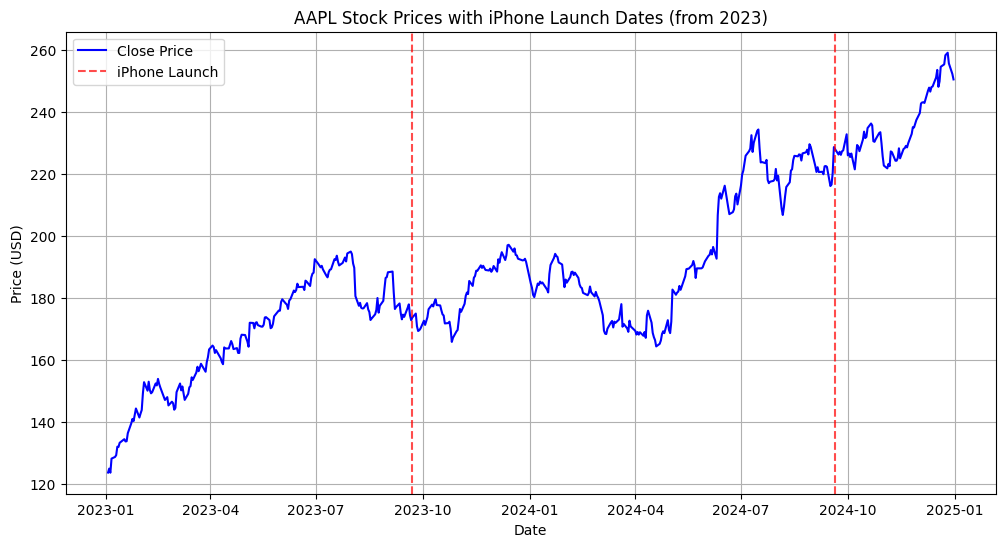

In [29]:
# GRAFICO COM OS 2 LANÇAMENTOS

# Caminho para os arquivos CSV
stock_file_path = r'C:\Users\davio\Datamodeling\cleaned_database.csv'
launch_file_path = r'C:\Users\davio\Datamodeling\iphone_launch_datas.csv'

# Ler arquivo CSV de ações
stock_data = pd.read_csv(stock_file_path, parse_dates=['Date'])
stock_data.set_index('Date', inplace=True)

# Filtrar o DataFrame para incluir apenas dados a partir de 2023
stock_data_2023 = stock_data.loc['2023-01-01':]

# Ler arquivo CSV de lançamentos
launch_data = pd.read_csv(launch_file_path)

# Converter a coluna 'Launch Date' para o tipo datetime
launch_data['Launch Date'] = pd.to_datetime(launch_data['Launch Date'])

# Filtrar lançamentos a partir de 2023
launch_data_2023 = launch_data[launch_data['Launch Date'] >= '2023-01-01']

# Plotar os preços de fechamento a partir de 2023
plt.figure(figsize=(12, 6))
plt.plot(stock_data_2023.index, stock_data_2023['Close'], label='Close Price', color='blue')

# Adicionar linhas verticais para cada lançamento de iPhone a partir de 2023
for launch_date in launch_data_2023['Launch Date']:
    plt.axvline(x=launch_date, color='red', linestyle='--', alpha=0.7)


# Formatação
plt.title('AAPL Stock Prices with iPhone Launch Dates (from 2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(['Close Price', 'iPhone Launch'])
plt.grid(True)
plt.show()

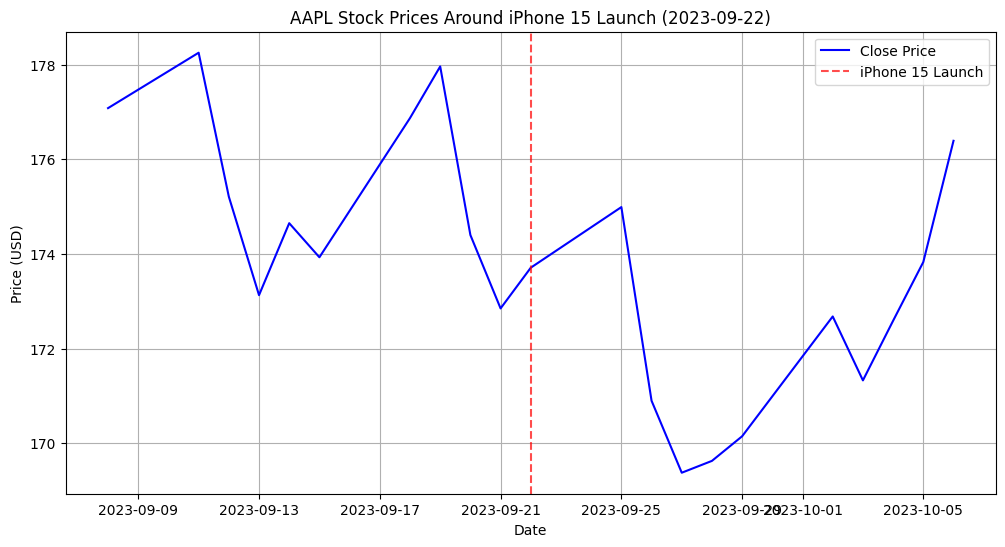

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para os arquivos CSV
stock_file_path = 'cleaned_database.csv'
launch_file_path = 'iphone_launch_datas.csv'

# Ler arquivo CSV de ações
stock_data = pd.read_csv(stock_file_path, parse_dates=['Date'])
stock_data.set_index('Date', inplace=True)

# Ler arquivo CSV de lançamentos
launch_data = pd.read_csv(launch_file_path)

# Converter a coluna 'Launch Date' para o tipo datetime
launch_data['Launch Date'] = pd.to_datetime(launch_data['Launch Date'])

# Variável para o iPhone escolhido (por exemplo, "iPhone 14")
selected_product = "iPhone 15"

# Selecionar a data de lançamento com base no produto escolhido
launch_focus = launch_data[launch_data['Product Name'] == selected_product]['Launch Date'].iloc[0]

# Definir o intervalo de duas semanas antes e depois do lançamento
start_date = launch_focus - pd.Timedelta(weeks=2)
end_date = launch_focus + pd.Timedelta(weeks=2)

# Filtrar o DataFrame de ações para o intervalo desejado
stock_data_focus = stock_data.loc[start_date:end_date]

# Plotar os preços de fechamento para o período filtrado
plt.figure(figsize=(12, 6))
plt.plot(stock_data_focus.index, stock_data_focus['Close'], label='Close Price', color='blue')

# Adicionar a linha vertical para o lançamento do iPhone
plt.axvline(x=launch_focus, color='red', linestyle='--', alpha=0.7, label=f'{selected_product} Launch')

# Formatação
plt.title(f'AAPL Stock Prices Around {selected_product} Launch ({launch_focus.date()})')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()